Pendiente (coeficiente): -0.09147938245065478
Intercepto: 5.403025210084038


<ipython-input-1-d443ccbe3d27>:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


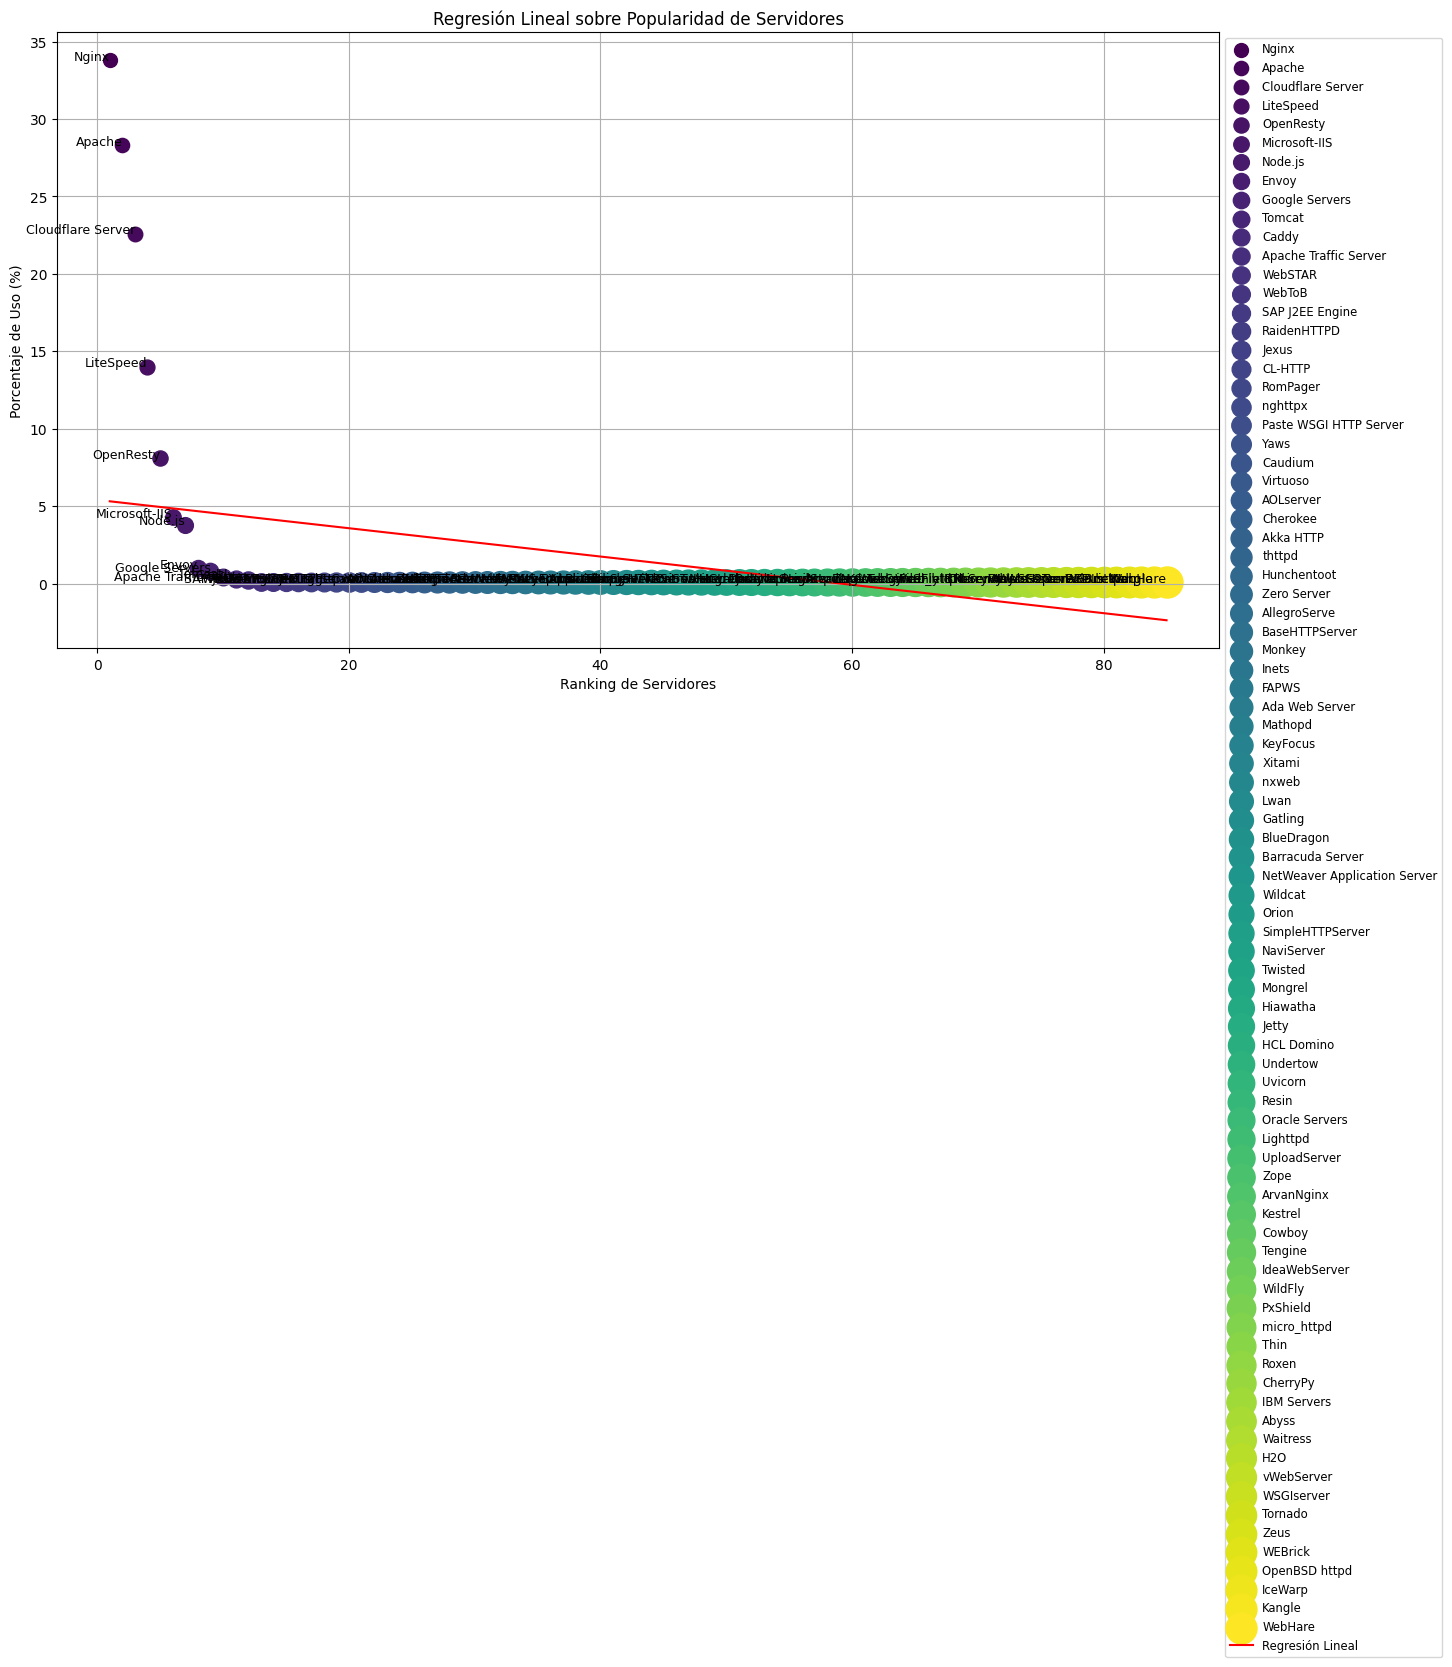

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar el archivo CSV
archivo_csv = "servidores_mas_usados_2023.csv"  # Cambia esto a la ruta de tu archivo real
df = pd.read_csv(archivo_csv)

# Eliminar los espacios al inicio y al final de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir todos los valores de la columna "Porcentaje" a cadenas de texto y luego a flotantes
df["Porcentaje"] = df["Porcentaje"].astype(str).str.rstrip('%').astype(float)

# Crear un índice ficticio como variable independiente
df = df.sort_values(by="Porcentaje", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Separar las variables independiente (Ranking) y dependiente (Porcentaje)
X = df[["Ranking"]].values  # Variable independiente
y = df["Porcentaje"].values  # Variable dependiente

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Mostrar los coeficientes del modelo
print("Pendiente (coeficiente):", model.coef_[0])
print("Intercepto:", model.intercept_)

# Graficar los datos reales y la regresión lineal
plt.figure(figsize=(15, 8))

# Usar diferentes colores y tamaños para los puntos
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
sizes = np.linspace(100, 500, len(df))

# Añadir los puntos de datos
for i in range(len(df)):
    plt.scatter(df["Ranking"][i], df["Porcentaje"][i], color=colors[i], s=sizes[i], label=df["Servidores"][i])

# Añadir línea de regresión
plt.plot(df["Ranking"], y_pred, color="red", label="Regresión Lineal")

# Añadir etiquetas de texto a cada punto de datos
for i in range(len(df)):
    plt.text(df["Ranking"][i], df["Porcentaje"][i], df["Servidores"][i], fontsize=9, ha='right')

# Etiquetas y título
plt.xlabel("Ranking de Servidores")
plt.ylabel("Porcentaje de Uso (%)")
plt.title("Regresión Lineal sobre Popularidad de Servidores")
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


